# Estadística descriptiva aplicada: distribuciones.

Ahora vamos a encontrar la probabilidad de encontrar un determinado valor.

## ¿Cómo visualizar una distribución?
- Histograma
- Función de probabilidad de masas (PMF)
- Función de distribución acumulada (CDF)
- Función de probabilidad de densidad (PDF)

Lo que nos importa ahora es encontrar la probabilidad de encontrar un cierto número o la probabilidad de encontrar un número menor a el, o también cual es la probabilidad de encuentre un valor entre 2 sitios. Estas son las funciones de probabilidad.

### Función de probabilidad de masas (PMFs)
Nos dice la probabilidad de que una variable aleatoria discreta tome un valor determinado.

Por ejemplo la edad. ¿Cuál es la probabilidad de que en mi salón haya personas que tengan 23 años?

### Función  de distribución acumulada (CDFs)
Devuelve la probabilidad de que una variable sea igual o menor que un valor determinado.

Siguiendo el ejemplo del salón. ¿Cuál es la probabilidad de que haya personas que tengan 23 años o menos años?

### Función de probabilidad de densidad (PDFs)
Determina la probabilidad de que una variable continua tome un valor determinado.

Por ejemplo la estatura. ¿Cuál es la probabilidad de que encuentre un pingüinos que mida 1.72 m?

Al ser números continuos podremos hacernos esas preguntas y ademas nos va a servir para realizarnos preguntas como por ejemplo:

¿Cuál es la probabilidad de que encuentre un pingüino que mida entre un valor A a B?

In [1]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos Preprocesados

In [5]:
preprocessed_penguins_df = pd.read_csv('dataset/penguins.csv')

## Distribuciones: PMF, CDF y PDF

### Función de probabilidad de masas (PFM)
#### Utilizando Seaborn

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

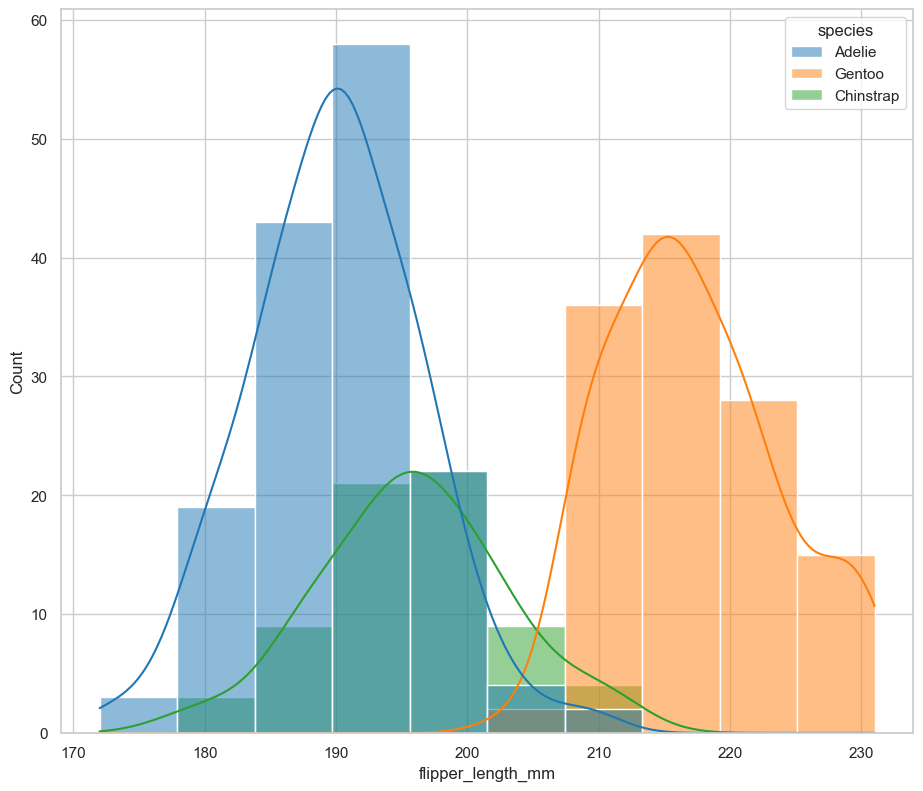

In [10]:
#Usando un histograma
sns.histplot(
    data=preprocessed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    kde='True'
)

Lo que tenemos en la gráfica anterior es la longitud de aletas de nuestros pingüinos. En el cual tenemos un número de intervalos y calcula que cantidad de números cae en ciertos intervalos.

Lo que nos interesa en la **función de probabilidad de masas (PMF)**, es encontrar para cada valor único **cuanta frecuencia tiene**.

Como tenemos valores discretos y enteros de longitud, es decir 20, 31, etc. Nos interesa tener estaturas enteras y que no estén dentro de ciertos rangos. Le asignaremos un ancho al `bin` de 1.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

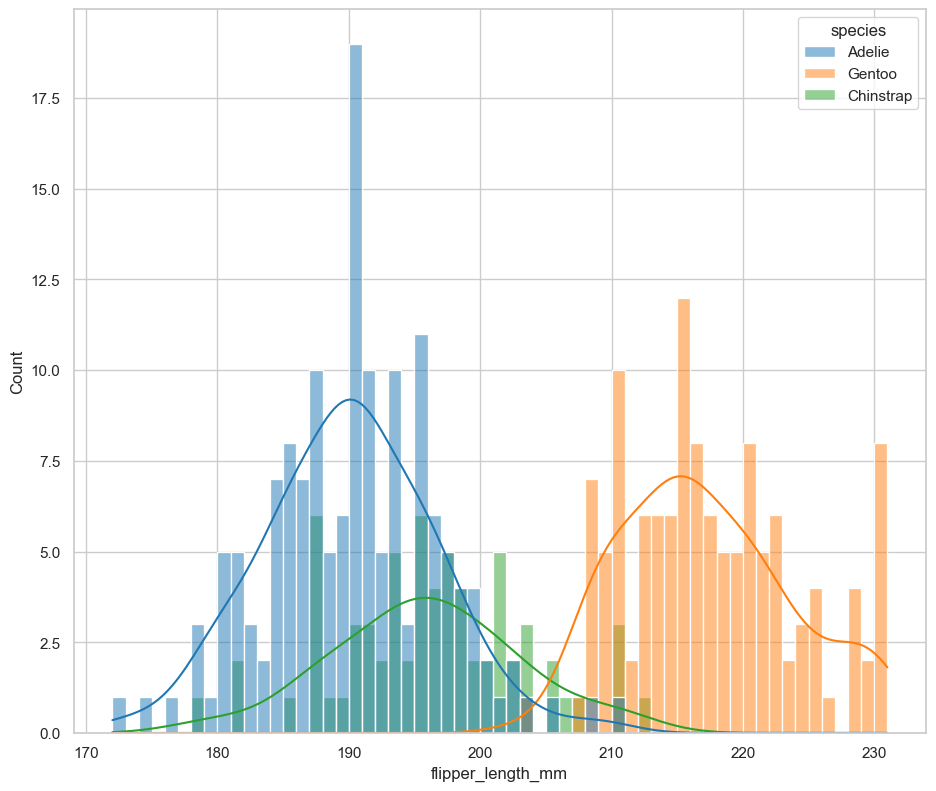

In [11]:
#Usando un histograma
sns.histplot(
    data=preprocessed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    kde='True',
    binwidth=1
)

Aquí nos damos cuenta de que tenemos ciertos valores y que no tenemos pingüinos que caigan dentro de ese valor. Es decir no existen observaciones con ese número.

Así de esta manera vemos que existen zonas con huecos y otras con altas frecuencias de coincidencia.

Observamos los valores en el eje Y (conteo), pero la función de densidad de probabilidad es un valor diferente, así que ajustemos.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

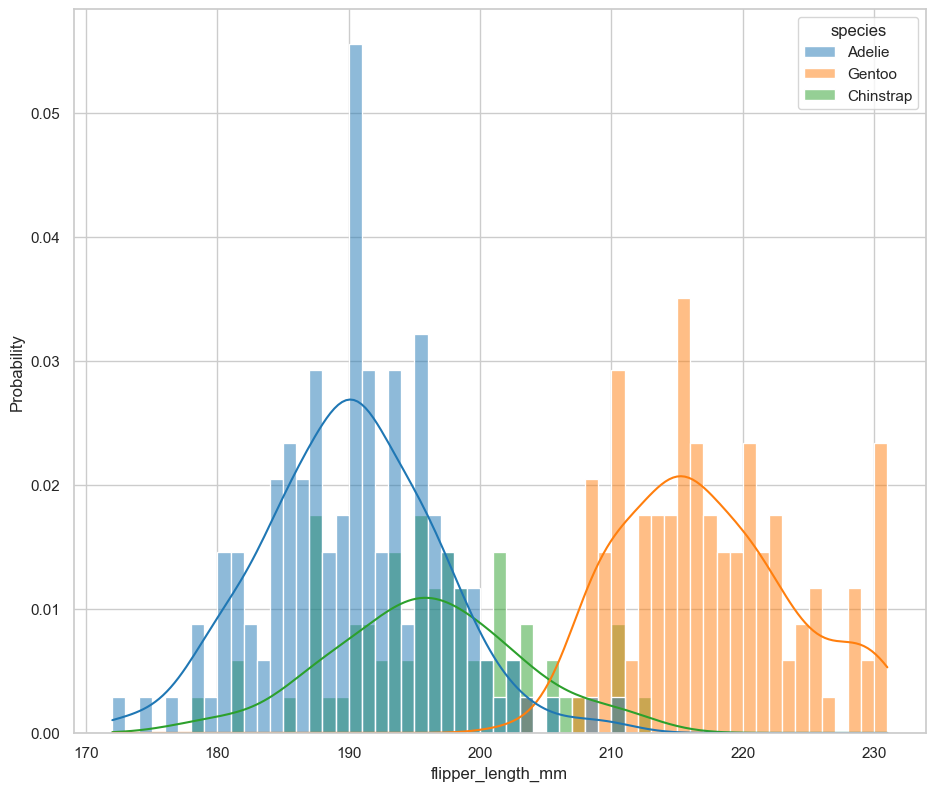

In [12]:
#Usando un histograma
sns.histplot(
    data=preprocessed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    kde='True',
    binwidth=1,
    stat='probability'
)

Ahora en lugar de que las barras representen su frecuencia, representan su probabilidad. Listo ya tenemos un PMF.

##### Utilizando `empiricaldist()`
Existen otras librerías que me pueden entregar los valores. Solo tenemos que hacer uso de ellas.

In [13]:
empiricaldist.Pmf.from_seq(
    preprocessed_penguins_df.flipper_length_mm
)

,probs
172.0,0.002924
174.0,0.002924
176.0,0.002924
178.0,0.011696
179.0,0.002924
180.0,0.014620
181.0,0.020468
182.0,0.008772
183.0,0.005848
184.0,0.020468


Como se puede observar me entrega una lista con sus respectivos valores. Si queremos convertir la lista a frecuencias, solo tenemos que ajustar el parámetro `Normalize=False`.

In [14]:
empiricaldist.Pmf.from_seq(
    preprocessed_penguins_df.flipper_length_mm,
    normalize=False
)

,probs
172.0,1
174.0,1
176.0,1
178.0,4
179.0,1
180.0,5
181.0,7
182.0,3
183.0,2
184.0,7


Ahora lo que haremos es guardar el conjunto de datos en una variable para ver sus posibles operaciones con este objeto.

In [19]:

pmf_flipper_len_mm = empiricaldist.Pmf.from_seq(
        preprocessed_penguins_df.flipper_length_mm
    )

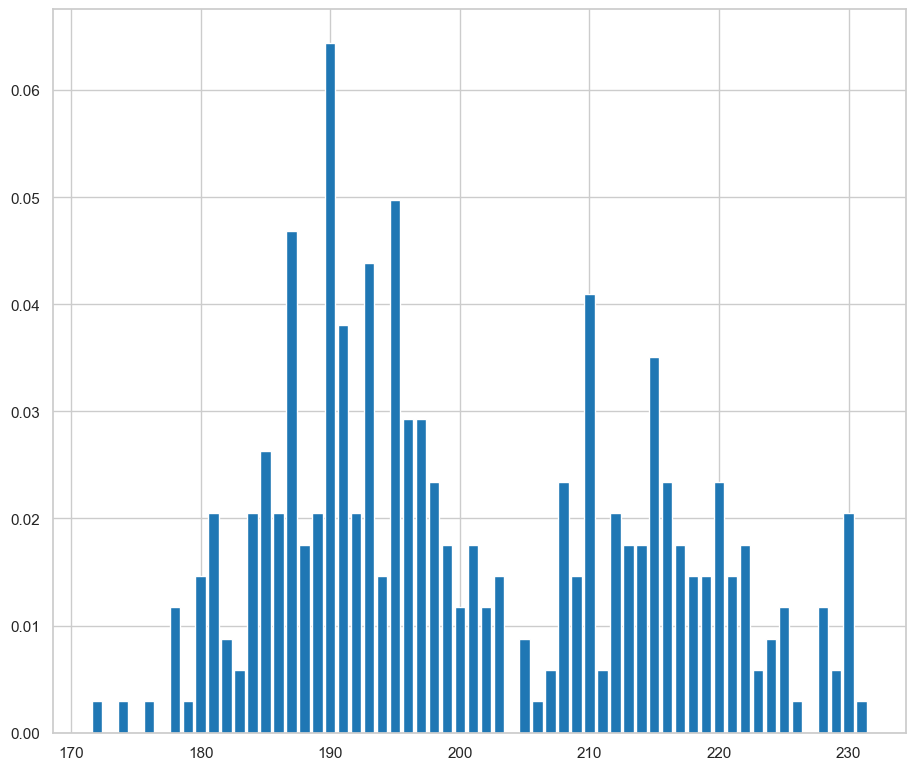

In [20]:
pmf_flipper_len_mm.bar()

Como se puede observar nos va a generar una gráfica como en Seaborn, por cada valor discreto que tengamos.

La librería nos permite hacer otras cosas. Por ejemplo calcular la probabilidad de que un pingüino tenga una longitud de ala de 190.

In [23]:
pmf_flipper_len_mm(190)

0.06432748538011696

Cómo se puede ver tenemos un parámetro que podemos obtenerlo fácilmente.

In [24]:
pmf_flipper_len_mm(175)

0

Ademas obtuvimos la probabilidad de otros valores, pero debido a que no están en el set de datos, nos arroja una probabilidad de 0, como se puede observar.

También podemos obtener parámetros específicos:

In [26]:
preprocessed_penguins_df.flipper_length_mm.max()

231.0

Si vemos los valores de la gráfica aparecen con `empiricaldist` y en `Seaborn` no aparecer, esto es debido a la forma en que hacen el cálculo. Entonces puede ser una desventaja en el sentido que en ocasiones te puede colapsar tus datos extremos, pero no es muy grave si queremos una vista global.

En cambio si queremos preguntas especificas, es mejor usar `empiricaldist`

#### Función de Probabilidad Acumulada (CDF)

Podemos encontrar probabilidades de un valor o menor a el.

Ejemplo: ¿Cual es la probabilidad de que encuentre un pingüino con una longitud de ala de 180 mm o menos?

##### Utilizando `Seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

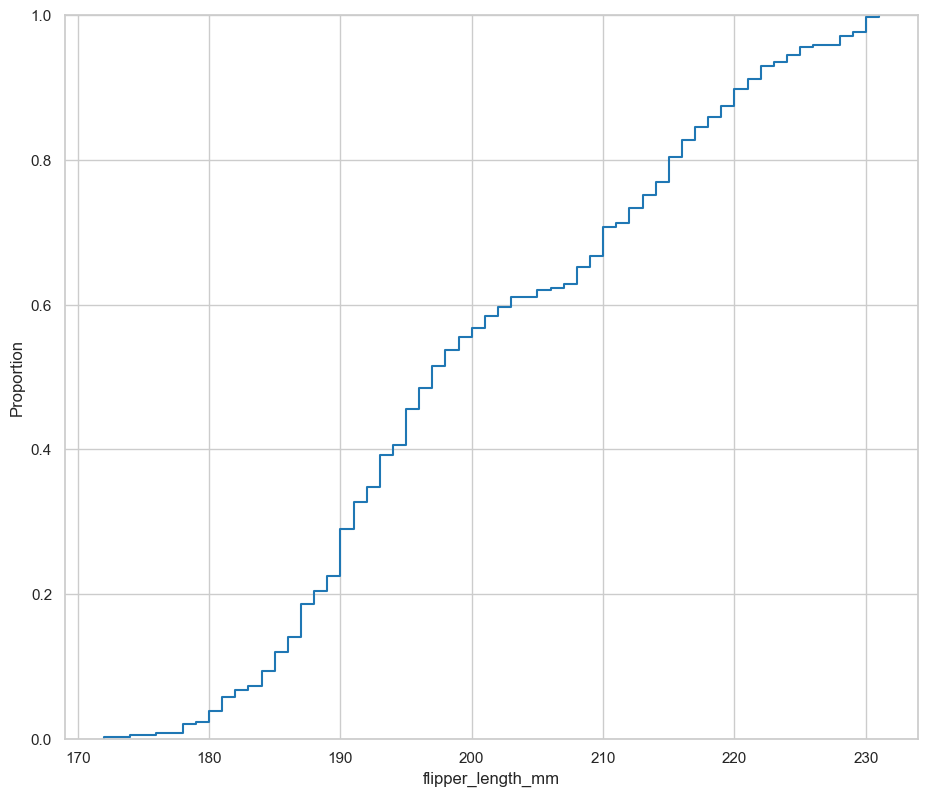

In [27]:
sns.ecdfplot(
    data=preprocessed_penguins_df,
    x='flipper_length_mm'
)

Listo, como se puede ver es **acumulada**, es decir al inicio es 0 y al final termina en 1. Porque la suma de las probabilidades de todos los eventos siempre será igual a 1.

Entonces como podría preguntar, tendría que hacer una estimación basada en la gráfica.

Por ejemplo:
- ¿Cuál es la probabilidad de que tenga 200 mm de longitud de ala? Como se puede ver en el eje Y corta aproximadamente en 0.59

La desventaja de Seaborn, es que solo nos entrega la gráfica y no nos permite ser más detallado. Para ello necesitamos `empiricaldist`.

In [28]:
#Guardamos el resultado en una variable
cdf_flipper_len_mm = empiricaldist.Cdf.from_seq(
    preprocessed_penguins_df.flipper_length_mm,
    normalize=True
)

<AxesSubplot: >

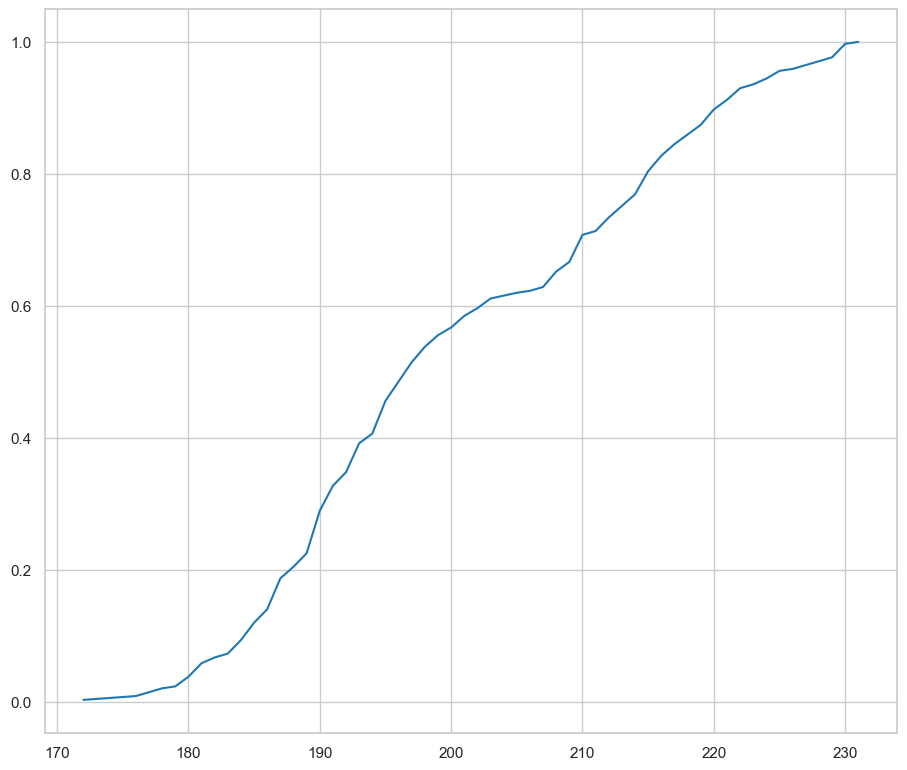

In [29]:
#Graficando
cdf_flipper_len_mm.plot()

Como se puede observar, tenemos nuestra función de probabilidad acumulada y es suavizada, aunque se puede cambiar para que sea en forma escalonada.

Y si queremos encontrar un valor determinado hacemos lo siguiente:

In [32]:
#Encontrando probabilidad acumulada 
#para el valor de 200
q=200
p =cdf_flipper_len_mm.forward(q)
p

array(0.56725146)

Aquí tenemos un valor más preciso y exacto. También podemos añadir guías para poder encontrar los valores.

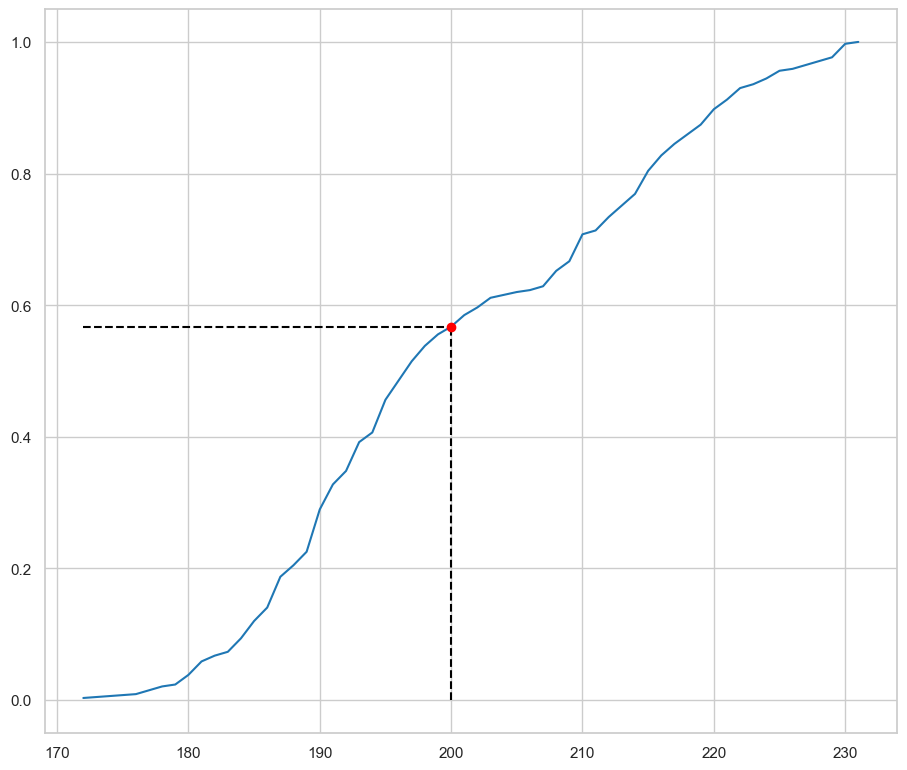

In [37]:
#Graficando
cdf_flipper_len_mm.plot()
#Colocando lineas
#vertical
plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyles='dashed'
)
#horizontal
plt.hlines(
    y=p,
    xmin=pmf_flipper_len_mm.qs[0],
    xmax=q,
    color='black',
    linestyles='dashed'
)
#Punto rojo
plt.plot(q,p,'ro')

Esto nos ayuda a encontrar apoyándonos de guías visuales.

Ahora, exi|ste una relación estrecha entre los **cuantiles** y este tipo de gráfica

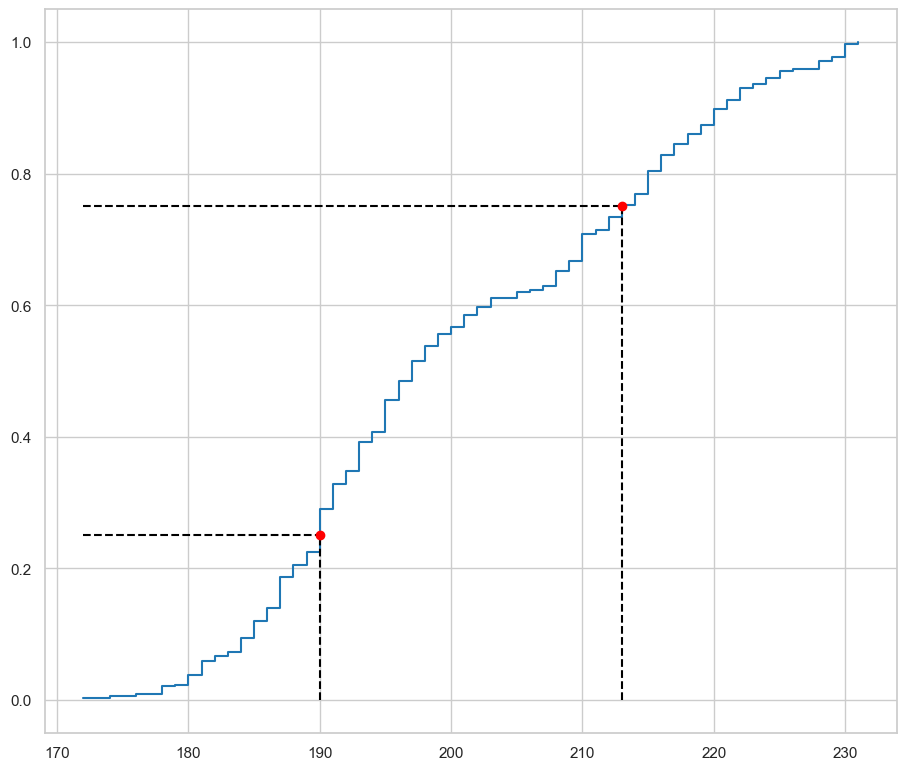

In [38]:
cdf_flipper_len_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_flipper_len_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_len_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

Ahora hay que poner atención en la función o parámetro `inverse`, ya que le damos una probabilidad y me calcula el valor inverso, en este caso el valor de la variable que tiene esa probabilidad.

#### Comparando distribuciones

Para este caso es mejor usar `Seaborn`, porque nos provee una manera sencilla de comparar distribuciones.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

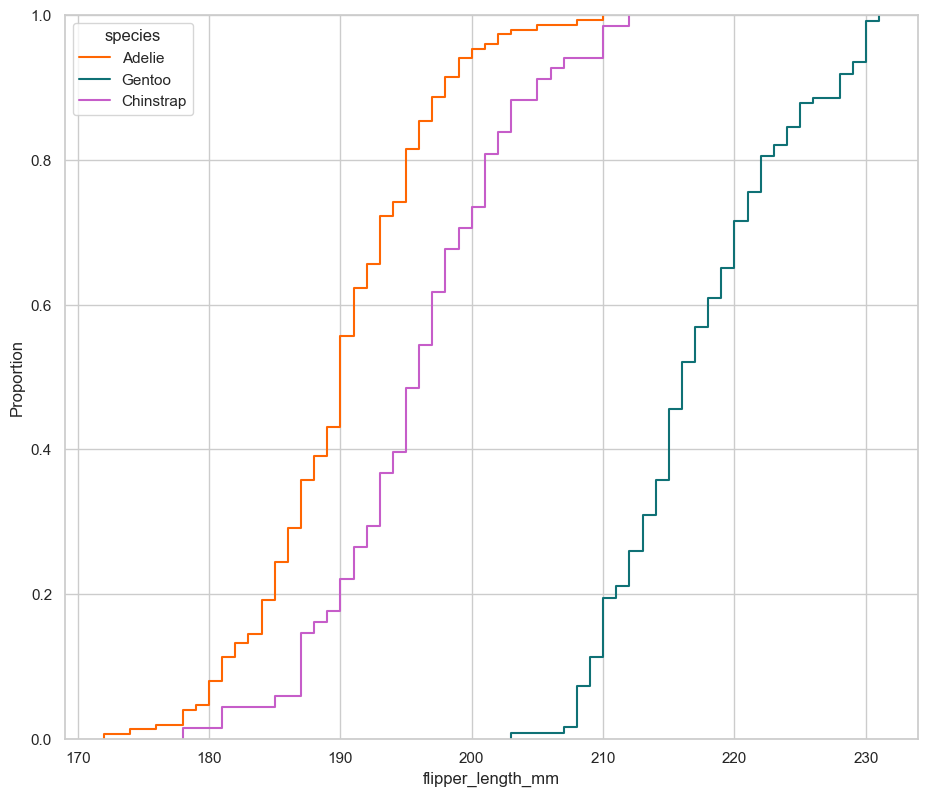

In [42]:
sns.ecdfplot(
    data=preprocessed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

Ahora yo puedo ver la distribución acumulada de probabilidad por cada una de las especies de pingüinos. 

Ya se que los Gentoo, tienen aletas mucho más grande que los **Adelie y Chinstrap**.